## 15-04-2025

In [17]:
#Sentiment Analysis using Logistic Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv(r"C:\Users\91805\Downloads\NLP\IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
29994,"I enjoyed the first ""Toxic Avenger,"" but the s...",negative
29995,"New York, I Love You finally makes it to our s...",positive
29996,This movie makes you wish imdb would let you v...,negative
29997,"Space Camp, which had the unfortunate luck to ...",negative


In [19]:
df['review']=df['review'].str.lower()

In [20]:
import re
def remove_html_tag(text):
    p=re.compile('<.*?>')
    return p.sub('',text)

In [21]:
df['review']=df['review'].apply(remove_html_tag)

In [22]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
29994,"i enjoyed the first ""toxic avenger,"" but the s...",negative
29995,"new york, i love you finally makes it to our s...",positive
29996,this movie makes you wish imdb would let you v...,negative
29997,"space camp, which had the unfortunate luck to ...",negative


In [23]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report

In [24]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
exclude=string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
df['review'] = df['review'].apply(preprocess)

In [27]:
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
29994,enjoyed first toxic avenger sequel didnt work ...,negative
29995,new york love finally makes shores 10 short st...,positive
29996,movie makes wish imdb would let vote zero one ...,negative
29997,space camp unfortunate luck planned around tim...,negative


In [28]:
df['label']=df['sentiment'].map({'positive':1,'negative':0})

In [29]:
df

,review,sentiment,label
0,one reviewers mentioned watching 1 oz episode ...,positive,1
1,wonderful little production filming technique ...,positive,1
2,thought wonderful way spend time hot summer we...,positive,1
3,basically theres family little boy jake thinks...,negative,0
4,petter matteis love time money visually stunni...,positive,1
...,...,...,...
29994,enjoyed first toxic avenger sequel didnt work ...,negative,0
29995,new york love finally makes shores 10 short st...,positive,1
29996,movie makes wish imdb would let vote zero one ...,negative,0
29997,space camp unfortunate luck planned around tim...,negative,0


In [31]:
x_train,x_test,y_train,y_test=train_test_split(df['sentiment'],df['label'],test_size=0.2,random_state=42)

In [32]:
vector=TfidfVectorizer(max_features=5000)

In [33]:
x_train_vec=vector.fit_transform(x_train)

In [34]:
x_test_vec=vector.transform(x_test)

In [36]:
model=LogisticRegression(max_iter=1000)

In [37]:
model.fit(x_train_vec,y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_pred=model.predict(x_test_vec)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [40]:
y_prob=model.predict_proba(x_test_vec)[:,1]
y_prob

array([9.99386075e-01, 6.18082709e-04, 6.18082709e-04, ...,
       6.18082709e-04, 9.99386075e-01, 9.99386075e-01])

In [42]:
cr=classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3025\n           1       1.00      1.00      1.00      2975\n\n    accuracy                           1.00      6000\n   macro avg       1.00      1.00      1.00      6000\nweighted avg       1.00      1.00      1.00      6000\n'

In [43]:
auc=roc_auc_score(y_test,y_prob)
auc

1.0

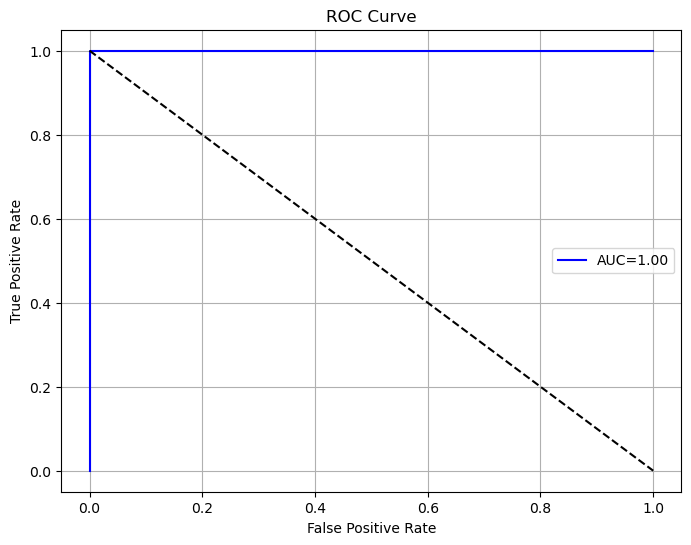

In [44]:
fpr,tpr,_=roc_curve(y_test,y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f'AUC={auc:.2f}',color='blue')
plt.plot([0,1],[1,0],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

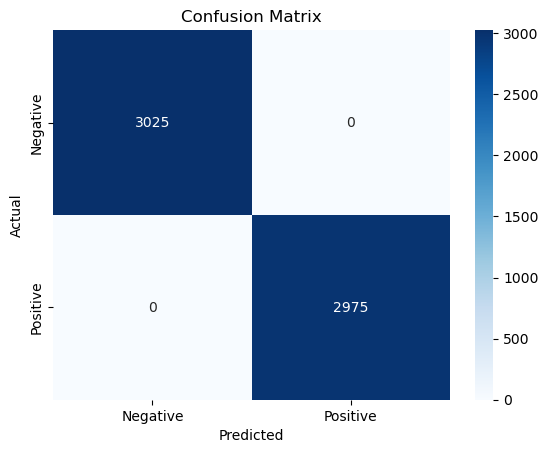

In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Topic Modeling using LDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

In [53]:
data = {
    "text": [
        "Apple is planning to release a new iPhone this fall.",
        "The government announced new policies on healthcare and education.",
        "Scientists discovered a new planet in a faraway galaxy.",
        "Google and Microsoft are competing in the AI race.",
        "NASA is preparing a new mission to explore the Moon.",
        "Stock markets fell after economic uncertainty.",
        "OpenAI released a powerful new language model.",
        "Elon Musk announced plans for a new Tesla factory in India.",
        "Education technology is evolving with AI-based personalized learning.",
        "Climate change remains a major issue for world leaders."
    ]
}
df = pd.DataFrame(data)
df

,text
0,Apple is planning to release a new iPhone this...
1,The government announced new policies on healt...
2,Scientists discovered a new planet in a farawa...
3,Google and Microsoft are competing in the AI r...
4,NASA is preparing a new mission to explore the...
5,Stock markets fell after economic uncertainty.
6,OpenAI released a powerful new language model.
7,Elon Musk announced plans for a new Tesla fact...
8,Education technology is evolving with AI-based...
9,Climate change remains a major issue for world...


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation

In [55]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
df['text']=df['text'].str.lower()

In [57]:
df

,text
0,apple is planning to release a new iphone this...
1,the government announced new policies on healt...
2,scientists discovered a new planet in a farawa...
3,google and microsoft are competing in the ai r...
4,nasa is preparing a new mission to explore the...
5,stock markets fell after economic uncertainty.
6,openai released a powerful new language model.
7,elon musk announced plans for a new tesla fact...
8,education technology is evolving with ai-based...
9,climate change remains a major issue for world...


In [58]:
import re
def remove_html_tag(text):
    p=re.compile('<.*?>')
    return p.sub('',text)

In [59]:
df['text']=df['text'].apply(remove_html_tag)

In [60]:
df

,text
0,apple is planning to release a new iphone this...
1,the government announced new policies on healt...
2,scientists discovered a new planet in a farawa...
3,google and microsoft are competing in the ai r...
4,nasa is preparing a new mission to explore the...
5,stock markets fell after economic uncertainty.
6,openai released a powerful new language model.
7,elon musk announced plans for a new tesla fact...
8,education technology is evolving with ai-based...
9,climate change remains a major issue for world...


In [61]:
exclude=string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,'')
    return text

In [63]:
df['text']=df['text'].apply(remove_punc)

In [65]:
df

,text
0,apple is planning to release a new iphone this...
1,the government announced new policies on healt...
2,scientists discovered a new planet in a farawa...
3,google and microsoft are competing in the ai race
4,nasa is preparing a new mission to explore the...
5,stock markets fell after economic uncertainty
6,openai released a powerful new language model
7,elon musk announced plans for a new tesla fact...
8,education technology is evolving with aibased ...
9,climate change remains a major issue for world...


In [66]:
def remove_stopwords(text):
    result=[]
    for word in text.split():
        if word in stopwords.words('english'):
            result.append('')
        else:
            result.append(word)
    x=result[:]
    result.clear()
    return ''.join(x)

In [67]:
df['text']=df['text'].apply(remove_stopwords)

In [68]:
df

,text
0,appleplanningreleasenewiphonefall
1,governmentannouncednewpolicieshealthcareeducation
2,scientistsdiscoverednewplanetfarawaygalaxy
3,googlemicrosoftcompetingairace
4,nasapreparingnewmissionexploremoon
5,stockmarketsfelleconomicuncertainty
6,openaireleasedpowerfulnewlanguagemodel
7,elonmuskannouncedplansnewteslafactoryindia
8,educationtechnologyevolvingaibasedpersonalized...
9,climatechangeremainsmajorissueworldleaders


In [70]:
vector=CountVectorizer(max_df=0.9,min_df=1,stop_words='english')
x=vector.fit_transform(df['text'])

In [71]:
lda=LatentDirichletAllocation(n_components=3,random_state=42)

In [72]:
lda.fit(x)

LatentDirichletAllocation(n_components=3, random_state=42)

In [74]:
def display_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx + 1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Show topics
print("\n🔹 Top Words per Topic:")
display_topics(lda, vector.get_feature_names_out(), 7)


🔹 Top Words per Topic:

Topic 1:
googlemicrosoftcompetingairace | scientistsdiscoverednewplanetfarawaygalaxy | governmentannouncednewpolicieshealthcareeducation | openaireleasedpowerfulnewlanguagemodel | stockmarketsfelleconomicuncertainty | elonmuskannouncedplansnewteslafactoryindia | nasapreparingnewmissionexploremoon

Topic 2:
educationtechnologyevolvingaibasedpersonalizedlearning | climatechangeremainsmajorissueworldleaders | stockmarketsfelleconomicuncertainty | elonmuskannouncedplansnewteslafactoryindia | openaireleasedpowerfulnewlanguagemodel | governmentannouncednewpolicieshealthcareeducation | scientistsdiscoverednewplanetfarawaygalaxy

Topic 3:
nasapreparingnewmissionexploremoon | appleplanningreleasenewiphonefall | elonmuskannouncedplansnewteslafactoryindia | stockmarketsfelleconomicuncertainty | governmentannouncednewpolicieshealthcareeducation | openaireleasedpowerfulnewlanguagemodel | scientistsdiscoverednewplanetfarawaygalaxy


## 16-04-2025

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Article
from newspaper import Article

In [9]:
pip install wikipedia


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11707 sha256=61862daffb5766a54962e655e32cbdcd654728b00e3cf8f1674c886e7ba9ab66
  Stored in directory: c:\users\91805\appdata\local\pip\cache\wheels\8f\ab\cb\45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [10]:
import wikipedia

# Fetch a long Wikipedia article
wiki_text = wikipedia.page("Artificial intelligence").content
print("✅ Wikipedia article loaded successfully!")
print("Total Words:", len(wiki_text.split()))
print(wiki_text[:1000])  # Preview


✅ Wikipedia article loaded successfully!
Total Words: 13300
Artificial intelligence (AI) refers to the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs.
High-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI:

In [13]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

In [14]:
def sumy_summary(wiki_text,num_sentences=5):
    parser = PlaintextParser.from_string(wiki_text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, num_sentences)
    return " ".join(str(sentence) for sentence in summary)

In [16]:
sumy_result = sumy_summary(wiki_text)
sumy_result

'A few examples are energy storage, medical diagnosis, military logistics, applications that predict the result of judicial decisions, foreign policy, or supply chain management. Economists have frequently highlighted the risks of redundancies from AI, and speculated about unemployment if there is no adequate social policy for full employment. Various AI models, such as Llama 2, Mistral or Stable Diffusion, have been made open-weight, meaning that their architecture and trained parameters (the "weights") are publicly available. Minsky\'s and Papert\'s book Perceptrons was understood as proving that artificial neural networks would never be useful for solving real-world tasks, thus discrediting the approach altogether. Deep learning\'s success was based on both hardware improvements (faster computers, graphics processing units, cloud computing) and access to large amounts of data (including curated datasets, such as ImageNet).'

In [20]:
# Abstractive Summarization with HuggingFace Transformers
!pip install transformers

In [24]:
print("\n📄 ORIGINAL LENGTH:", len(wiki_text.split()), "words")
print("\n✂️ SUMY LENGTH:", len(sumy_result.split()), "words")


📄 ORIGINAL LENGTH: 13300 words

✂️ SUMY LENGTH: 130 words


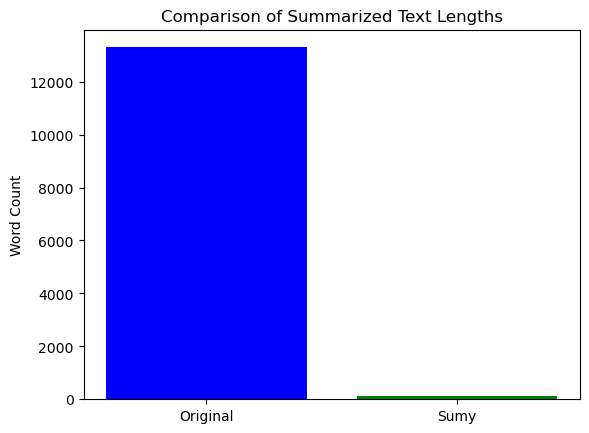

In [25]:
import matplotlib.pyplot as plt

lengths = {
    "Original": len(wiki_text.split()),
    "Sumy": len(sumy_result.split()),
}

plt.bar(lengths.keys(), lengths.values(), color=["blue", "green", "orange", "purple"])
plt.ylabel("Word Count")
plt.title("Comparison of Summarized Text Lengths")
plt.show()


In [27]:
# Text Preprocessing
import nltk
from nltk.corpus import stopwords
import string

In [28]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
text= ["I love NLP!", "Text preprocessing is important in data science."]
text

['I love NLP!', 'Text preprocessing is important in data science.']

In [32]:
cleaned=[]
for char in text:
    words=char.lower().translate(str.maketrans('','',string.punctuation))
    filterd=[word for word in words if word not in stop_words]
    cleaned.append(" ".join(filterd))
print(cleaned)

['  l v e   n l p', 'e x   p r e p r c e n g     p r n   n     c e n c e']


In [33]:
#  Bag of Words Representation
from sklearn.feature_extraction.text import CountVectorizer
text=["I love NLP", "NLP is amazing"]
vector=CountVectorizer()
x=vector.fit_transform(text)

In [34]:
print(vector.get_feature_names_out())

['amazing' 'is' 'love' 'nlp']


In [35]:
print(x.toarray())

[[0 0 1 1]
 [1 1 0 1]]


In [36]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:

docs = ["NLP is fun", "I love learning NLP", "NLP stands for Natural Language Processing"]
docs

['NLP is fun',
 'I love learning NLP',
 'NLP stands for Natural Language Processing']

In [38]:
tfidf=TfidfVectorizer()
xtfidf=tfidf.fit_transform(docs)

In [40]:
print(tfidf.get_feature_names_out())

['for' 'fun' 'is' 'language' 'learning' 'love' 'natural' 'nlp'
 'processing' 'stands']


In [41]:
print(xtfidf.toarray())

[[0.         0.65249088 0.65249088 0.         0.         0.
  0.         0.38537163 0.         0.        ]
 [0.         0.         0.         0.         0.65249088 0.65249088
  0.         0.38537163 0.         0.        ]
 [0.43238509 0.         0.         0.43238509 0.         0.
  0.43238509 0.2553736  0.43238509 0.43238509]]


In [42]:
#  Sentiment Analysis with Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
texts = ["I love this product", "This is bad", "Very good", "Worst ever", "Excellent", "Terrible"]
labels = [1, 0, 1, 0, 1, 0]

In [44]:
vector=CountVectorizer()
x=vector.fit_transform(texts)
y=labels

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [46]:
model=MultinomialNB()

In [47]:
model.fit(x_train,y_train)

MultinomialNB()

In [48]:
model.score(x_test,y_test)

0.5

In [52]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.label_)


Apple ORG
U.K. GPE
$1 billion MONEY


In [53]:
# Text Classification with TF-IDF + Logistic Regression
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', names=['label', 'message'])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [55]:
x_train,x_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2)

In [56]:
vector=TfidfVectorizer()

In [57]:
x_train_tf=vector.fit_transform(x_train)

In [58]:
x_test_tf=vector.transform(x_test)

In [59]:
model=LogisticRegression()

In [60]:
model.fit(x_train_tf,y_train)

LogisticRegression()

In [61]:
y_pred=model.predict(x_test_tf)
y_pred

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'spam'], dtype=object)

In [62]:

ac=accuracy_score(y_test,y_pred)
ac

0.968609865470852

In [63]:
# Topic Modeling using Latent Dirichlet Allocation (LDA)
text=[
    "Stocks rally as tech giants report strong earnings",
    "Biden meets world leaders for climate change summit",
    "New COVID variant detected in Europe",
    "Apple launches new AI-powered Siri"
]

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [65]:
vector=CountVectorizer(stop_words='english')
dtm=vector.fit_transform(text)

In [66]:
lda=LatentDirichletAllocation(n_components=2,random_state=0)

In [67]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=2, random_state=0)

In [68]:
for idx,topic in enumerate(lda.components_):
    print(f"Topic {idx}:",[vector.get_feature_names_out()[i] for i in topic.argsort()[-5:]])

Topic 0: ['biden', 'leaders', 'climate', 'world', 'new']
Topic 1: ['tech', 'rally', 'earnings', 'stocks', 'strong']


In [70]:
# Build a Word Cloud from Tweets
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
  Using cached wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp311-cp311-win_amd64.whl (299 kB)


In [71]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [72]:
tweets = "AI is transforming healthcare and finance. AI tools like ChatGPT are changing the game."
tweets

'AI is transforming healthcare and finance. AI tools like ChatGPT are changing the game.'

In [74]:
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(tweets)

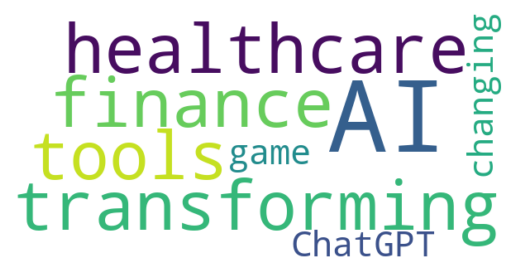

In [75]:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [76]:
# POS Tagging Using NLTK

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [77]:
sentence = "Machine learning models require a lot of data to perform well."


In [78]:
tokens = nltk.word_tokenize(sentence)
tags = nltk.pos_tag(tokens)

In [79]:
tags

[('Machine', 'NN'),
 ('learning', 'NN'),
 ('models', 'NNS'),
 ('require', 'VBP'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('data', 'NNS'),
 ('to', 'TO'),
 ('perform', 'VB'),
 ('well', 'RB'),
 ('.', '.')]

## 17-04-2025

In [3]:
# Named Entity Recognition (NER) using spaCy
import spacy
nlp=spacy.load('en_core_web_sm')
text = "Apple Inc. is looking to buy a startup in the UK for $1 billion."

In [6]:
doc=nlp(text)
for ent in doc.ents:
    print(ent.text,ent.label_)

Apple Inc. ORG
UK GPE
$1 billion MONEY


In [8]:
# Text Classification using Logistic Regression
from sklearn.datasets import fetch_20newsgroups
category=['rec.sport.hockey','sci.med']
data=fetch_20newsgroups(subset='train',categories=category)
data

{'data': ["From: e8l6@jupiter.sun.csd.unb.ca (Rocket)\nSubject: NHL Final point standings\nOrganization: University of New Brunswick\nDistribution: rec.sport.hockey\nLines: 694\n\n\n    Individual leaders by total points (Final standings)\n    NOTE: Games played and points per games not accurate !!\n\n    Player       Team   GP  G   A  Pts ppg  Prj PIM +/-\n\n    M.Lemieux    PIT    59  69  91 160 2.71 160  38  53\n    LaFontaine   BUF    82  53  95 148 1.80 148  63  13\n    Oates        BOS    83  45  97 142 1.71 142  32  12\n    Yzerman      DET    83  58  79 137 1.65 137  44  33\n    Turgeon      NYI    80  58  74 132 1.65 132  26  -2\n    Selanne      WIN    82  76  56 132 1.61 132  45   6\n    Mogilny      BUF    75  76  51 127 1.69 127  40   9\n    Gilmour      TOR    81  32  95 127 1.57 127  96  32\n    Robitaille   LA     82  63  62 125 1.52 127 100  16\n    Recchi       PHI    81  53  70 123 1.52 123  95  -2\n    Sundin       QUE    79  47  67 114 1.44 114  96  19\n    Stevens

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

In [10]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2)

In [11]:
vector=CountVectorizer()
x_train_vec=vector.fit_transform(x_train)
x_test_vec=vector.transform(x_test)

In [12]:
model=LogisticRegression()

In [13]:
model.fit(x_train_vec,y_train)

LogisticRegression()

In [14]:
y_pred=model.predict(x_test_vec)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [15]:
cr=classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.99       118\n           1       0.98      0.99      0.99       121\n\n    accuracy                           0.99       239\n   macro avg       0.99      0.99      0.99       239\nweighted avg       0.99      0.99      0.99       239\n'

In [16]:
# POS Tagging using NLTK
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [17]:
text='Natural languager processing is amazing'
tokens=nltk.word_tokenize(text)


In [18]:
nltk.pos_tag(tokens)

[('Natural', 'NNP'),
 ('languager', 'NN'),
 ('processing', 'NN'),
 ('is', 'VBZ'),
 ('amazing', 'VBG')]

In [19]:
# Sentiment Analysis with VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...


True

In [20]:
sid=SentimentIntensityAnalyzer()

In [21]:
text="The movie was absolutely fantastic!"
sid.polarity_scores(text)

{'neg': 0.0, 'neu': 0.489, 'pos': 0.511, 'compound': 0.6352}

In [22]:
#  Topic Modeling using LDA

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
docs = [
    "I love playing football.",
    "Python is an awesome programming language.",
    "Football players are very fit.",
    "Java and Python are used in software development.",
    "The World Cup is the biggest football tournament."
]

In [24]:
vector=CountVectorizer()
x=vector.fit_transform(docs)

In [25]:
lda=LatentDirichletAllocation(n_components=2,random_state=0)
lda.fit(x)

LatentDirichletAllocation(n_components=2, random_state=0)

In [26]:
for i, topic in enumerate(lda.components_):
    print(f"Topic{i}")
    print([vector.get_feature_names_out()[index] for index in topic.argsort()[-5:]])

Topic0
['in', 'software', 'java', 'are', 'python']
Topic1
['tournament', 'world', 'is', 'the', 'football']


In [27]:
#  Text Classification with TF-IDF and Logistic Regression
import pandas as pd
import numpy as np

In [28]:
data = {
    'Review': ['Amazing movie!', 'Terrible acting', 'Loved it', 'Worst film ever', 'It was good', 'Not my type'],
    'Sentiment': [1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
df

,Review,Sentiment
0,Amazing movie!,1
1,Terrible acting,0
2,Loved it,1
3,Worst film ever,0
4,It was good,1
5,Not my type,0


In [29]:
x_train,x_text,y_train,y_test=train_test_split(df['Review'],df['Sentiment'],test_size=0.2)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [31]:
vector=TfidfVectorizer()
x_train_vec=vector.fit_transform(x_train)
x_text_vec=vector.transform(x_text)

In [32]:
model=LogisticRegression()

In [33]:
model.fit(x_train_vec,y_train)

LogisticRegression()

In [34]:
y_pred=model.predict(x_text_vec)
y_pred

array([0, 0], dtype=int64)

In [35]:
cr=classification_report(y_test,y_pred)
cr

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklea

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n'

In [36]:
# Named Entity Recognition (NER) with spaCy
import spacy
nlp=spacy.load('en_core_web_sm')
text = "Apple Inc. was founded by Steve Jobs and is headquartered in Cupertino."
doc = nlp(text)
doc

Apple Inc. was founded by Steve Jobs and is headquartered in Cupertino.

In [37]:
for ent in doc.ents:
    print(ent.text,ent.label_)

Apple Inc. ORG
Steve Jobs PERSON
Cupertino GPE


In [38]:
# Topic Modeling using LDA
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [39]:
texts = ['Elections bring new policies', 'Government releases new budget',
         'Football match was exciting', 'Olympics are coming soon']
texts

['Elections bring new policies',
 'Government releases new budget',
 'Football match was exciting',
 'Olympics are coming soon']

In [40]:
vector=CountVectorizer()
x=vector.fit_transform(texts)

In [41]:
lda=LatentDirichletAllocation(n_components=2)
lda.fit(x)

LatentDirichletAllocation(n_components=2)

In [43]:
for idx,topic in enumerate(lda.components_):
    print(f"Topic{idx}:")
    print([vector.get_feature_names_out()[i] for i in topic.argsort()[-5:]])

Topic0:
['was', 'match', 'football', 'exciting', 'new']
Topic1:
['are', 'olympics', 'soon', 'coming', 'new']


In [44]:
# Cosine Similarity Between Texts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [45]:
texts=["Data science is amazing", "I love machine learning"]
vec=TfidfVectorizer()
tfidf=vec.fit_transform(texts)

In [46]:
similarity=cosine_similarity(tfidf[0:1],tfidf[1:2])
print(similarity[0][0])

0.0


In [48]:
# Extract Most Common Words (Text Cleaning + Frequency)
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

In [49]:
text = "The quick brown fox jumps over the lazy dog. The fox is very quick and clever."
text

'The quick brown fox jumps over the lazy dog. The fox is very quick and clever.'

In [53]:
words=nltk.word_tokenize(text.lower())

In [55]:
words=[w for w in words if w.isalpha() and w not in stopwords.words('english')]

In [56]:
freq=Counter(words)

In [57]:
print(freq.most_common(5))

[('quick', 2), ('fox', 2), ('brown', 1), ('jumps', 1), ('lazy', 1)]


In [58]:
# Text Classification with Multinomial Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [59]:
texts = ["I love this movie", "Horrible acting", "Great plot", "Terrible direction"]
labels = [1, 0, 1, 0]

In [60]:
vector=CountVectorizer()
x=vector.fit_transform(texts)

In [61]:
model=MultinomialNB()

In [62]:
model.fit(x,labels)

MultinomialNB()

In [63]:
test=vector.transform(['Amazing director'])
model.predict(test)

array([0])

In [72]:
# Sentiment Classification with Logistic Regression
data = {
    'text': ['I love this phone', 'Worst experience ever', 'Amazing performance', 'Not worth the money'],
    'label': [1, 0, 1, 0]
}
df=pd.DataFrame(data)
df

,text,label
0,I love this phone,1
1,Worst experience ever,0
2,Amazing performance,1
3,Not worth the money,0


In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [76]:
vector=CountVectorizer()
x=vector.fit_transform(df['text'])

In [77]:
y=df['label']

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
model=LogisticRegression()

In [80]:
model.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_pred=model.predict(x_test)
y_pred

array([1], dtype=int64)

In [82]:
ac=accuracy_score(y_test,y_pred)
ac

0.0

In [83]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[0, 1],
       [0, 0]], dtype=int64)

In [84]:
cr=classification_report(y_test,y_pred)
cr

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklea

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       1.0\n           1       0.00      0.00      0.00       0.0\n\n    accuracy                           0.00       1.0\n   macro avg       0.00      0.00      0.00       1.0\nweighted avg       0.00      0.00      0.00       1.0\n'

## 18-04-2025

In [4]:
!pip install -U sentence-transformers

In [6]:
# Sentence Similarity
from sentence_transformers import SentenceTransformer, util
model=SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\91805\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91805\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
sent1 = "Dogs are awesome pets."
sent2 = "Cats are wonderful animals."

In [8]:
em1=model.encode(sent1,convert_to_tensor=True)
em2=model.encode(sent2,convert_to_tensor=True)

In [9]:
similarity=util.pytorch_cos_sim(em1,em2)

In [10]:
similarity

tensor([[0.7143]])

In [11]:
# Text Classification using TF-IDF + Logistic Regression
texts = ["I love this movie", "This was a terrible experience", "Amazing acting", "Worst plot ever"]
labels = [1, 0, 1, 0]

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(texts)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,labels,test_size=0.2)

In [17]:
model=LogisticRegression()

In [18]:
model.fit(x_train,y_train)

LogisticRegression()

In [19]:
model.predict(x_test)

array([1])

In [20]:
#  Text Summarization using HuggingFace Transformers
from transformers import pipeline
summary=pipeline('summarization')
text = "The history of artificial intelligence is long and complex. It began in the 1950s..."
summ=summary(text,max_length=30,min_length=10,do_sample=False)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

C:\Users\91805\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91805\.cache\huggingface\hub\models--sshleifer--distilbart-cnn-12-6. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 30, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


In [21]:
summ[0]['summary_text']

' The history of artificial intelligence is long and complex . It began in the 1950s .'

In [1]:
# Text Classification Using Naive Bayes
import pandas as pd
df=pd.read_csv(r"C:\Users\91805\Downloads\NLP\IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
29994,"I enjoyed the first ""Toxic Avenger,"" but the s...",negative
29995,"New York, I Love You finally makes it to our s...",positive
29996,This movie makes you wish imdb would let you v...,negative
29997,"Space Camp, which had the unfortunate luck to ...",negative


In [2]:
df['review']=df['review'].str.lower()

In [3]:
import re 
def remove_html(text):
    p=re.compile('<.*?>')
    return p.sub('',text)
    

In [4]:
df['review']=df['review'].apply(remove_html)

In [5]:
import string
exclude=string.punctuation

In [6]:
def remove_punctuation(text):
    for char in exclude:
        text=text.replace(char,'')
    return text

In [7]:
df['review']=df['review'].apply(remove_punctuation)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [9]:
x_train,x_test,y_train,y_test=train_test_split(df['review'],df['sentiment'],test_size=0.2,random_state=42)

In [10]:
cv=CountVectorizer(stop_words='english')

In [11]:
x_train_vec=cv.fit_transform(x_train)

In [12]:
x_test_vec=cv.transform(x_test)

In [13]:
model=MultinomialNB()

In [14]:
model.fit(x_train_vec,y_train)

MultinomialNB()

In [15]:
y_pred=model.predict(x_test_vec)
y_pred

array(['negative', 'positive', 'negative', ..., 'negative', 'positive',
       'negative'], dtype='<U8')

In [16]:
ac=accuracy_score(y_test,y_pred)
ac

0.8546666666666667

In [17]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2651,  374],
       [ 498, 2477]], dtype=int64)

In [18]:
cr=classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n    negative       0.84      0.88      0.86      3025\n    positive       0.87      0.83      0.85      2975\n\n    accuracy                           0.85      6000\n   macro avg       0.86      0.85      0.85      6000\nweighted avg       0.86      0.85      0.85      6000\n'

In [19]:
tfidf=TfidfVectorizer(stop_words='english')


In [20]:
x_train_tfidf=tfidf.fit_transform(x_train)

In [21]:
x_test_tfidf=tfidf.transform(x_test)

In [22]:
model2=MultinomialNB()

In [23]:
model2.fit(x_train_tfidf,y_train)

MultinomialNB()

In [24]:
y_pred_tfidf=model.predict(x_test_tfidf)
y_pred

array(['negative', 'positive', 'negative', ..., 'negative', 'positive',
       'negative'], dtype='<U8')

In [25]:
ac=accuracy_score(y_test,y_pred_tfidf)
ac

0.8501666666666666

In [26]:
cm=confusion_matrix(y_test,y_pred_tfidf)
cm

array([[2551,  474],
       [ 425, 2550]], dtype=int64)

In [27]:
cr=classification_report(y_test,y_pred_tfidf)
cr

'              precision    recall  f1-score   support\n\n    negative       0.86      0.84      0.85      3025\n    positive       0.84      0.86      0.85      2975\n\n    accuracy                           0.85      6000\n   macro avg       0.85      0.85      0.85      6000\nweighted avg       0.85      0.85      0.85      6000\n'

## 19-04-2025

In [1]:
# Named Entity Recognition (NER) with spaCy
import spacy
nlp=spacy.load('en_core_web_sm')

In [2]:
text='Apple was founded by steve jobs in Cupertino'
doc=nlp(text)
doc

Apple was founded by steve jobs in Cupertino

In [3]:
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_})")

Apple (ORG)
steve jobs (PERSON)
Cupertino (GPE)


In [4]:
# Word Similarity using Word2Vec
import gensim.downloader as api

In [5]:
model = api.load("word2vec-google-news-300")

[========================================----------] 81.6% 1356.4/1662.8MB downloaded

In [6]:
word1='king'
word2='queen'

In [8]:
similarity=model.similarity(word1,word2)

In [10]:
print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")

Similarity between 'king' and 'queen': 0.6511


In [11]:
#  Implement a Custom Tokenizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

In [12]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words=set(stopwords.words('english'))
stemmer=PorterStemmer()
punctuations=set(string.punctuation)

In [15]:
def tokenize(text):
    tokens=word_tokenize(text)
    cleaned_tokens=[
        stemmer.stem(word.lower())
        for word in tokens
        if word.lower() not in stop_words and word not in punctuations
    ]
    return cleaned_tokens

In [17]:
text='This is a sample sentence'
output=tokenize(text)
print(output)

['sampl', 'sentenc']


In [18]:
#  POS Tagging using spacy
import spacy
nlp=spacy.load('en_core_web_sm')

In [19]:
text='I love natural language processing.'
doc=nlp(text)
doc

I love natural language processing.

In [21]:
pos_tag=[(token.text,token.pos_) for token in doc]
print(pos_tag)

[('I', 'PRON'), ('love', 'VERB'), ('natural', 'ADJ'), ('language', 'NOUN'), ('processing', 'NOUN'), ('.', 'PUNCT')]


In [22]:
#  POS Tagging using NLTK
import nltk
from nltk import word_tokenize,pos_tag

In [23]:
nltk.download('punkt')
nltk.download('averaged_preceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading averaged_preceptron_tagger: Package
[nltk_data]     'averaged_preceptron_tagger' not found in index


False

In [24]:
text='I love natural language processing'
tokens=word_tokenize(text)
pos_tag=pos_tag(tokens)
print(pos_tag)

[('I', 'PRP'), ('love', 'VBP'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN')]


## 20-04-2025

In [1]:
# Sentiment Analysis with Pretrained VADER
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data = {
    'Review': [
        "This product is amazing! Totally worth the price.",
        "Worst experience ever. Would not recommend.",
        "It's okay, does the job but nothing special.",
        "Absolutely love it! Will buy again!",
        "Terrible quality. Broke after a week.",
        "Average product. You get what you pay for.",
        "Superb! Exceeded my expectations.",
        "Not bad, but delivery was late.",
        "Awful customer service, very disappointed.",
        "Nice design and works well. Happy with it."
    ]
}

df = pd.DataFrame(data)
df

,Review
0,This product is amazing! Totally worth the price.
1,Worst experience ever. Would not recommend.
2,"It's okay, does the job but nothing special."
3,Absolutely love it! Will buy again!
4,Terrible quality. Broke after a week.
5,Average product. You get what you pay for.
6,Superb! Exceeded my expectations.
7,"Not bad, but delivery was late."
8,"Awful customer service, very disappointed."
9,Nice design and works well. Happy with it.


In [3]:
sid=SentimentIntensityAnalyzer()

In [10]:
def get_sentiment(text):
    score=sid.polarity_scores(text)['compound']
    if score>=0.05:
        return 'Positive'
    elif score<= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [11]:
df['sentiment']=df['Review'].apply(get_sentiment)

In [12]:
df

,Review,sentiment
0,This product is amazing! Totally worth the price.,Positive
1,Worst experience ever. Would not recommend.,Negative
2,"It's okay, does the job but nothing special.",Negative
3,Absolutely love it! Will buy again!,Positive
4,Terrible quality. Broke after a week.,Negative
5,Average product. You get what you pay for.,Negative
6,Superb! Exceeded my expectations.,Positive
7,"Not bad, but delivery was late.",Positive
8,"Awful customer service, very disappointed.",Negative
9,Nice design and works well. Happy with it.,Positive


In [13]:
# Build an Inverted Index (Like a Search Engine)
import re
from collections import defaultdict

In [14]:
documents = [
    "The sky is blue.",
    "The sun is bright.",
    "The sun in the blue sky is bright.",
    "We can see the shining sun, the bright sun."
]
documents

['The sky is blue.',
 'The sun is bright.',
 'The sun in the blue sky is bright.',
 'We can see the shining sun, the bright sun.']

In [15]:
def tokenize(text):
    text=text.lower()
    return re.findall(r'\b\w+\b',text)

In [17]:
def build_inverted_index(docs):
    index=defaultdict(set)
    for i, doc in enumerate(docs):
        words=tokenize(doc)
        for word in words:
            index[word].add(i)
    return dict(index)

In [18]:
inverted_index=build_inverted_index(documents)
inverted_index

{'the': {0, 1, 2, 3},
 'sky': {0, 2},
 'is': {0, 1, 2},
 'blue': {0, 2},
 'sun': {1, 2, 3},
 'bright': {1, 2, 3},
 'in': {2},
 'we': {3},
 'can': {3},
 'see': {3},
 'shining': {3}}

In [19]:
for word, doc_ids in inverted_index.items():
    print(f"{word}: {sorted(doc_ids)}")

the: [0, 1, 2, 3]
sky: [0, 2]
is: [0, 1, 2]
blue: [0, 2]
sun: [1, 2, 3]
bright: [1, 2, 3]
in: [2]
we: [3]
can: [3]
see: [3]
shining: [3]


In [21]:
def boolean_search(query,index):
    tokens=query.lower().split()
    result=set()
    if "and" in tokens:
        left=index.get(tokens[0],set())
        right=index.get(tokens[2],set())
        result=left & right
    elif "or" in tokens:
        left=index.get(tokens[0],set())
        right=index.get(tokens[2],set())
        result=left | right
    elif "not" in tokens:
        universe=set(range(len(documents)))
        term=tokens[1]
        result=universe-index.get(term,set())
    else:
        result=index.get(tokens[0],set())
    return result

In [22]:
queries = [
    "sun AND bright",
    "sky OR sun",
    "NOT blue",
    "sun",
    "bright AND blue"
]

In [23]:
for q in queries:
    res=boolean_search(q,inverted_index)
    print(f"{q}: Documents {sorted(res)}")

sun AND bright: Documents [1, 2, 3]
sky OR sun: Documents [0, 1, 2, 3]
NOT blue: Documents [1, 3]
sun: Documents [1, 2, 3]
bright AND blue: Documents [2]


In [24]:
# Implement TF-IDF from Scratch
import numpy as np
import pandas as pd
import re
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [25]:
documents = [
    "The sky is blue.",
    "The sun is bright.",
    "The sun in the blue sky is bright.",
    "We can see the shining sun, the bright sun."
]
# tokenizer
def tokenize(text):
    text=text.lower()
    return re.findall(r'\b\w+\b',text)

In [28]:
# Build Vacubulary
vocab=set()
token=[]
for doc in documents:
    tokens=tokenize(doc)
    token.append(tokens)
    vocab.update(tokens)
vocab=sorted(list(vocab))
vocab_index={word: idx for idx,word in enumerate(vocab)}

In [29]:
# TF calculation
def compute_tf(doc_tokens):
    tf = np.zeros(len(vocab))
    total_terms = len(doc_tokens)
    for word in doc_tokens:
        tf[vocab_index[word]] += 1
    return tf / total_terms

In [30]:
# IDF calculation
def compute_idf(docs):
    N = len(docs)
    df = np.zeros(len(vocab))
    for tokens in docs:
        seen = set()
        for word in tokens:
            if word not in seen:
                df[vocab_index[word]] += 1
                seen.add(word)
    idf = np.log((N) / (1 + df)) + 1  # Smooth
    return idf

In [32]:
tf_matrix=np.array([compute_tf(tokens) for tokens in token])
tf_matrix

array([[0.25      , 0.        , 0.        , 0.        , 0.25      ,
        0.        , 0.        , 0.25      , 0.        , 0.25      ,
        0.        ],
       [0.        , 0.25      , 0.        , 0.        , 0.25      ,
        0.        , 0.        , 0.        , 0.25      , 0.25      ,
        0.        ],
       [0.125     , 0.125     , 0.        , 0.125     , 0.125     ,
        0.        , 0.        , 0.125     , 0.125     , 0.25      ,
        0.        ],
       [0.        , 0.11111111, 0.11111111, 0.        , 0.        ,
        0.11111111, 0.11111111, 0.        , 0.22222222, 0.22222222,
        0.11111111]])

In [33]:
idf_vector=compute_idf(token)
idf_vector

array([1.28768207, 1.        , 1.69314718, 1.69314718, 1.        ,
       1.69314718, 1.69314718, 1.28768207, 1.        , 0.77685645,
       1.69314718])

In [35]:
tfidf_matrix=tf_matrix*idf_vector
tfidf_matrix

array([[0.32192052, 0.        , 0.        , 0.        , 0.25      ,
        0.        , 0.        , 0.32192052, 0.        , 0.19421411,
        0.        ],
       [0.        , 0.25      , 0.        , 0.        , 0.25      ,
        0.        , 0.        , 0.        , 0.25      , 0.19421411,
        0.        ],
       [0.16096026, 0.125     , 0.        , 0.2116434 , 0.125     ,
        0.        , 0.        , 0.16096026, 0.125     , 0.19421411,
        0.        ],
       [0.        , 0.11111111, 0.18812746, 0.        , 0.        ,
        0.18812746, 0.18812746, 0.        , 0.22222222, 0.17263477,
        0.18812746]])

In [36]:
tfidf_df=pd.DataFrame(tfidf_matrix,columns=vocab)
tfidf_df

,blue,bright,can,in,is,see,shining,sky,sun,the,we
0,0.321921,0.000000,0.000000,0.000000,0.250,0.000000,0.000000,0.321921,0.000000,0.194214,0.000000
1,0.000000,0.250000,0.000000,0.000000,0.250,0.000000,0.000000,0.000000,0.250000,0.194214,0.000000
2,0.160960,0.125000,0.000000,0.211643,0.125,0.000000,0.000000,0.160960,0.125000,0.194214,0.000000
3,0.000000,0.111111,0.188127,0.000000,0.000,0.188127,0.188127,0.000000,0.222222,0.172635,0.188127


In [37]:
vector=TfidfVectorizer()

In [38]:
sklearn_tfidf=vector.fit_transform(documents)
sklearn_tfidf

<4x11 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [40]:
sklearn_df=pd.DataFrame(sklearn_tfidf.toarray(),columns=vector.get_feature_names_out())
sklearn_df.round(3)

,blue,bright,can,in,is,see,shining,sky,sun,the,we
0,0.569,0.000,0.000,0.000,0.460,0.000,0.000,0.569,0.000,0.376,0.000
1,0.000,0.522,0.000,0.000,0.522,0.000,0.000,0.000,0.522,0.427,0.000
2,0.369,0.299,0.000,0.469,0.299,0.000,0.000,0.369,0.299,0.489,0.000
3,0.000,0.239,0.375,0.000,0.000,0.375,0.375,0.000,0.478,0.391,0.375


## 21-04-2025

In [2]:
! pip install langdetect langid

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     - -------------------------------------- 30.7/981.5 kB ? eta -:--:--
     --- ----------------------------------- 92.2/981.5 kB 1.3 MB/s eta 0:00:01
     --------- ---------------------------- 235.5/981.5 kB 1.8 MB/s eta 0:00:01
     ----------------- -------------------- 440.3/981.5 kB 2.5 MB/s eta 0:00:01
     ------------------------ ------------- 634.9/981.5 kB 2.9 MB/s eta 0:00:01
     -------------------------------- ----- 829.4/981.5 kB 3.1 MB/s eta 0:00:01
     -------------------------------------  972.8/981.5 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ----- ---------------------------------- 0.3/1.9 MB 5.9 MB/s eta 0:00:01
     -------- ----------------------------

In [4]:
# Language Detection
from langdetect import detect,DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
import langid

In [5]:
DetectorFactory.seed = 0

In [6]:
sentences = [
    "Hello, how are you?",                # English
    "Bonjour, comment ça va ?",          # French
    "Hallo, wie geht es dir?",           # German
    "Hola",                              # Spanish (short)
    "Ciao",                              # Italian (ambiguous)
    "おはよう",                            # Japanese
    "Привет",                            # Russian
    "Hi",                                # English (very short)
    "la",                                # Ambiguous
]

In [7]:
def detect_lang_langdetect(text):
    try:
        return detect(text)
    except LangDetectException:
        return "Unknown"

In [8]:
def detect_lang_langid(text):
    lang, prob = langid.classify(text)
    return f"{lang} ({prob:.2f})"

In [9]:
print("🔍 Language Detection Results:\n")
for sentence in sentences:
    ld = detect_lang_langdetect(sentence)
    li = detect_lang_langid(sentence)
    print(f"Text: {sentence}")
    print(f" - langdetect: {ld}")
    print(f" - langid    : {li}\n")

🔍 Language Detection Results:

Text: Hello, how are you?
 - langdetect: en
 - langid    : en (-18.74)

Text: Bonjour, comment ça va ?
 - langdetect: fr
 - langid    : fr (-71.68)

Text: Hallo, wie geht es dir?
 - langdetect: de
 - langid    : de (-91.23)

Text: Hola
 - langdetect: tr
 - langid    : en (9.06)

Text: Ciao
 - langdetect: pt
 - langid    : en (9.06)

Text: おはよう
 - langdetect: ja
 - langid    : ja (-108.88)

Text: Привет
 - langdetect: bg
 - langid    : ru (-66.79)

Text: Hi
 - langdetect: nl
 - langid    : en (9.06)

Text: la
 - langdetect: es
 - langid    : en (9.06)



In [1]:
# Language Detection
from langdetect import detect,DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
import langid

In [2]:
DetectorFactory.seed = 0

In [3]:
sentences = [
    "Hello, how are you?",                # English
    "Bonjour, comment ça va ?",          # French
    "Hallo, wie geht es dir?",           # German
    "Hola",                              # Spanish (short)
    "Ciao",                              # Italian (ambiguous)
    "おはよう",                            # Japanese
    "Привет",                            # Russian
    "Hi",                                # English (very short)
    "la",                                # Ambiguous
]

In [4]:
def detect_lang_langdetect(text):
    try:
        return detect(text)
    except LangDetectException:
        return "Unknown"

In [5]:
def detect_lang_langid(text):
    lang, prob = langid.classify(text)
    return f"{lang} ({prob:.2f})"

In [6]:
print("🔍 Language Detection Results:\n")
for sentence in sentences:
    ld = detect_lang_langdetect(sentence)
    li = detect_lang_langid(sentence)
    print(f"Text: {sentence}")
    print(f" - langdetect: {ld}")
    print(f" - langid    : {li}\n")

🔍 Language Detection Results:

Text: Hello, how are you?
 - langdetect: en
 - langid    : en (-18.74)

Text: Bonjour, comment ça va ?
 - langdetect: fr
 - langid    : fr (-71.68)

Text: Hallo, wie geht es dir?
 - langdetect: de
 - langid    : de (-91.23)

Text: Hola
 - langdetect: tr
 - langid    : en (9.06)

Text: Ciao
 - langdetect: pt
 - langid    : en (9.06)

Text: おはよう
 - langdetect: ja
 - langid    : ja (-108.88)

Text: Привет
 - langdetect: bg
 - langid    : ru (-66.79)

Text: Hi
 - langdetect: nl
 - langid    : en (9.06)

Text: la
 - langdetect: es
 - langid    : en (9.06)



## 23-04-2025

In [9]:
# N-gram Generator
def generator_ngrams(text,n):
    tokens=text.strip().split()
    ngrams=[]
    for i in range(len(tokens)-n+1):
        ngram=tuple(tokens[i:i+n])
        ngrams.append(ngram)
    return ngrams
generator_ngrams('Natural language processing is fun',3)

[('Natural', 'language', 'processing'),
 ('language', 'processing', 'is'),
 ('processing', 'is', 'fun')]

In [12]:
# Word Frequency Visualizer
def word_freq(text):
    words=text.split()
    freq={}
    for i in words:
        if i in freq:
            freq[i]+=1
        else:
            freq[i]=1
    return freq
word_freq("Natural Language Processing is fun. Language is powerful. Processing text with code is interesting and fun.")

{'Natural': 1,
 'Language': 2,
 'Processing': 2,
 'is': 3,
 'fun.': 2,
 'powerful.': 1,
 'text': 1,
 'with': 1,
 'code': 1,
 'interesting': 1,
 'and': 1}

{'natural': 1, 'language': 2, 'processing': 2, 'is': 3, 'fun.': 2, 'powerful.': 1, 'text': 1, 'with': 1, 'code': 1, 'interesting': 1, 'and': 1}
